In [176]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [177]:
data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Bureau\car_insurance_premium_dataset.csv")

# EDA

In [178]:
data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [164]:
print("The data shape is :", data.shape)

The data shape is : (1000, 7)


In [165]:
# Extract information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [166]:
# Check for missing values

print("\n The total number of missing value for each variable is \n")
print(data.isnull().sum())


 The total number of missing value for each variable is 

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64


In [167]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns

In [168]:
print("\n Summary data is : ")

print(data[numerical_columns].describe())


 Summary data is : 
        Driver Age  Driver Experience  Previous Accidents  \
count  1000.000000        1000.000000           1000.0000   
mean     41.575000          14.759000              2.5680   
std      13.765677          10.544292              1.6989   
min      18.000000           0.000000              0.0000   
25%      30.000000           6.000000              1.0000   
50%      42.000000          13.000000              3.0000   
75%      53.000000          23.000000              4.0000   
max      65.000000          40.000000              5.0000   

       Annual Mileage (x1000 km)  Car Manufacturing Year      Car Age  \
count                1000.000000             1000.000000  1000.000000   
mean                   17.933000             2007.637000    17.363000   
std                     4.410665               10.363331    10.363331   
min                    11.000000             1990.000000     0.000000   
25%                    14.000000             1999.000000     8.0

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


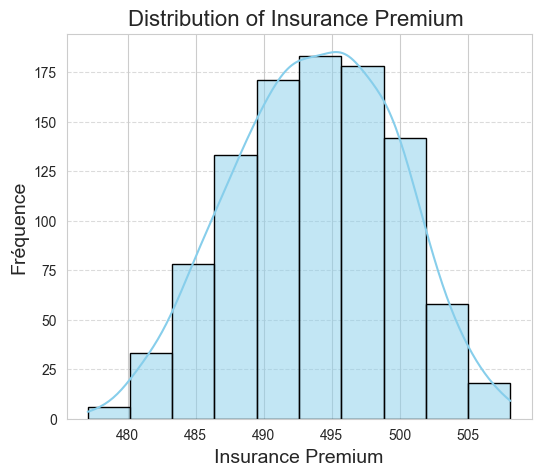

In [169]:
# Analyse the target variable ( Insurance Premium ($)  )
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))  
sns.histplot(data['Insurance Premium ($)'], kde=True, color='skyblue', bins=10, edgecolor='black')
plt.title('Distribution of Insurance Premium ', fontsize=16)
plt.xlabel('Insurance Premium', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

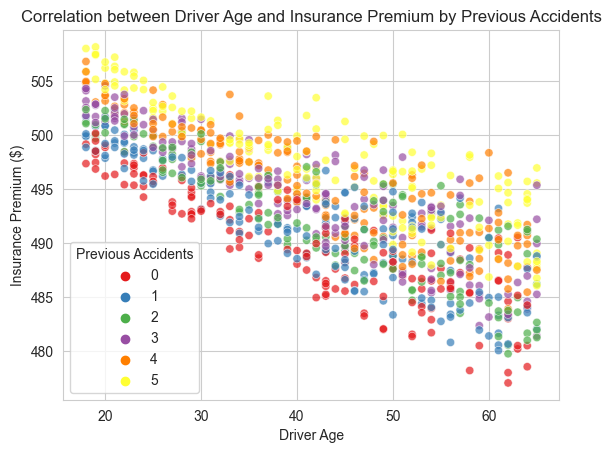

In [170]:
# Correlation between Driver Age and Insurance Premium by Previous Accidents
sns.scatterplot(x='Driver Age', y='Insurance Premium ($)', hue='Previous Accidents', data=data, palette='Set1', alpha=0.7)

plt.xlabel('Driver Age')
plt.ylabel('Insurance Premium ($)')
plt.title("Correlation between Driver Age and Insurance Premium by Previous Accidents")
plt.show()

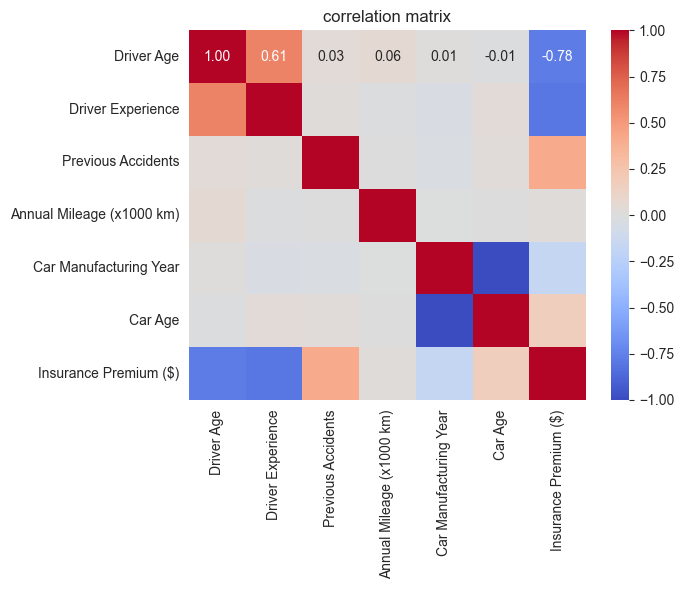

In [171]:
# Heatmap of Variable Correlations
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix')
plt.show()

In [173]:
# Calculate the correlation between the predictive variables and the target variable
correlation_matrix = data.corr()
correlation_with_Insurance_premium = correlation_matrix['Insurance Premium ($)'].sort_values(ascending=False)

# Display the correlation between the independent variables (X) and the dependent variable (Y)
print("Correlation between independent variables and the target variable:\n", correlation_with_Insurance_premium)

Correlation between independent variables and the target variable:
 Insurance Premium ($)        1.000000
Previous Accidents           0.410786
Car Age                      0.171829
Annual Mileage (x1000 km)    0.022131
Car Manufacturing Year      -0.171829
Driver Age                  -0.776848
Driver Experience           -0.803323
Name: Insurance Premium ($), dtype: float64


In [175]:
# Verify if there is multicollinearity

X = data[['Previous Accidents', 'Car Age', 'Annual Mileage (x1000 km)',
        'Car Manufacturing Year', 'Driver Age', 'Driver Experience']]

X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

                    Variable       VIF
0                      const  0.000000
1         Previous Accidents  1.001967
2                    Car Age       inf
3  Annual Mileage (x1000 km)  1.007155
4     Car Manufacturing Year       inf
5                 Driver Age  1.600562
6          Driver Experience  1.596969


C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [179]:
# Delete Car Manufacturing Year

In [183]:
new_data = data.drop(['Car Manufacturing Year'], axis=1)
new_data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Age,Insurance Premium ($)
0,56,32,4,17,23,488.35
1,46,19,0,21,0,486.15
2,32,11,4,15,5,497.55
3,60,0,4,19,34,498.35
4,25,7,0,13,20,495.55


# Data preprocessing

In [184]:
# Separate the explanatory variables and the target variable

X = new_data.drop(['Insurance Premium ($)'], axis=1)
y = new_data['Insurance Premium ($)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Initialize and apply MinMaxScaler for feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
# Linear Regression simple

# Prepare the Data for Simple Linear Regression: : 

X_train_lr = pd.DataFrame(X_train_scaled, columns=X.columns)[['Previous Accidents']]
X_test_lr = pd.DataFrame(X_test_scaled, columns=X.columns)[['Previous Accidents']]

# Train the Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_lr, y_train)

# Make Predictions on the Test Dataset
y_pred_lr = model_linear_regression.predict(X_test_lr)

# Evaluate the Model
print(f"R² Score: {round(r2_score(y_test, y_pred_lr),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_lr),2)}")
print(f"RMSE : {round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 2)}")


R² Score: 0.22
MSE: 26.47
RMSE : 5.15


In [196]:
def entrainer_et_evaluer_model(model):
    
    # Train the model on scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    return model, r2, mse, rmse

# Multiple linear Regression

In [205]:
linear_model, linear_r2, linear_mse, linear_rmse = entrainer_et_evaluer_model(LinearRegression())
print(f"Linear regression Multiple : \n R²: {round(linear_r2,2)} \n MSE: {linear_mse}\n RMSE: {linear_rmse}")

Linear regression Multiple : 
 R²: 1.0 
 MSE: 2.5203159288725063e-27
 RMSE: 5.0202748220316646e-14


# Decision Trees

In [206]:
decision_tree_model, decision_tree_r2 , decision_tree_mse , decision_tree_rmse  = train_and_evaluate_model(DecisionTreeRegressor())
print(f"Decision Tree Regressor :\n R² : {round(decision_tree_r2,2)}\n MSE : {round(decision_tree_mse,2)} \n RMSE :{round(decision_tree_rmse,2)}")

Decision Tree Regressor :
 R² : 0.94
 MSE : 2.06 
 RMSE :1.43


# Random Forest

In [207]:
random_forest_model, random_forest_r2 , random_forest_mse , random_forest_rmse  = train_and_evaluate_model(RandomForestRegressor())
print(f" Random forest :\n R² : {round(random_forest_r2,2)}\n MSE : {round(random_forest_mse,2)} \n RMSE :{round(random_forest_rmse,2)}")

 Random forest :
 R² : 0.98
 MSE : 0.55 
 RMSE :0.74


# XgBoost

In [208]:
Xgboost_model, Xgboost_r2 , Xgboost_mse , Xgboost_rmse  = train_and_evaluate_model(XGBRegressor())
print(f" XgBoost :\n R² : {round(Xgboost_r2,2)}\n MSE : {round(Xgboost_mse,2)} \n RMSE :{round(Xgboost_rmse,2)}")

 XgBoost :
 R² : 0.99
 MSE : 0.44 
 RMSE :0.67


# Model Performance Evaluation and Comparison

In [212]:
# Store the results
results = []

for name, model in models.items():
    trained_model, r2, mse, rmse = train_and_evaluate_model(model)
    results.append({
        "Model": name,
        "R²": round(r2, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2)
    })

# Display the results as a table
df_results = pd.DataFrame(results)
print(df_results)


               Model    R²   MSE  RMSE
0  Linear Regression  1.00  0.00  0.00
1      Random Forest  0.98  0.56  0.75
2      Decision Tree  0.94  1.94  1.39
3            XgBoost  0.99  0.44  0.67


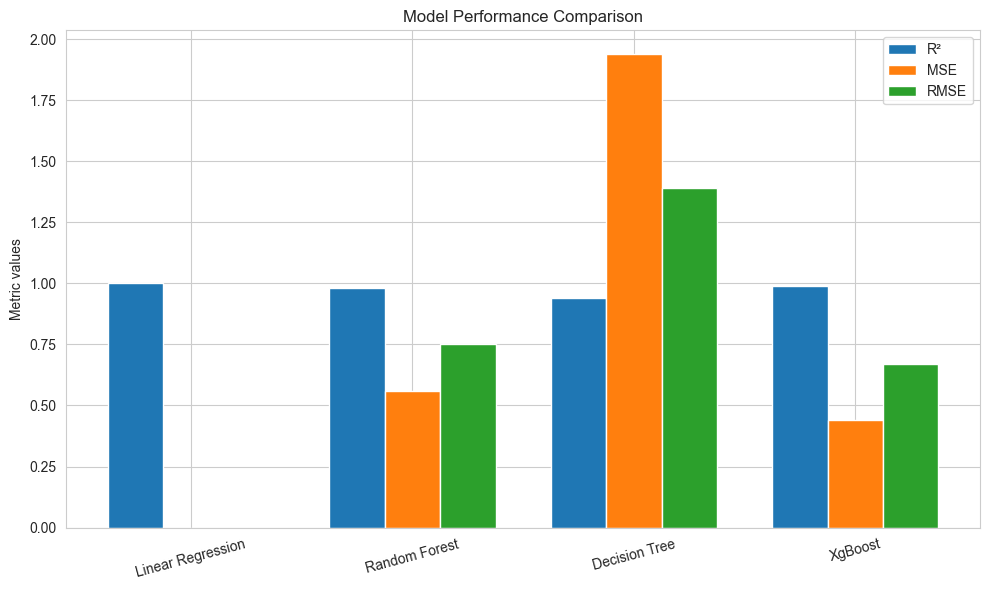

In [213]:
# Comparison chart
plt.figure(figsize=(10, 6))
x = np.arange(len(df_results))
bar_width = 0.25

plt.bar(x - bar_width, df_results["R²"], width=bar_width, label="R²")
plt.bar(x, df_results["MSE"], width=bar_width, label="MSE")
plt.bar(x + bar_width, df_results["RMSE"], width=bar_width, label="RMSE")

plt.xticks(x, df_results["Model"], rotation=15)
plt.ylabel("Metric values")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()
